<a href="https://colab.research.google.com/github/smojumder018/SUPREME/blob/main/2.2%20FFNN_MNIST_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Feedforward Neural Network with PyTorch
## About Feedforward Neural Network


       
##1. Introduction


![](https://drive.google.com/uc?export=view&id=142_j-YDgvnjrwOb7UGSuM6Hsx7u_iJTI)

### Non-linear activation function

- Function: takes a number & perform mathematical operation
- Common Types of Non-linearity
    - ReLUs (Rectified Linear Units)      
    - Sigmoid     
    - Tanh

#### Sigmoid (Logistic)
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Input number $\rightarrow$ [0, 1]
    - Large negative number $\rightarrow$ 0
    - Large positive number $\rightarrow$ 1
- Cons:
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - Solution: Have to carefully initialize weights to prevent this
    2. Outputs not centered around 0
        - If output always positive $\rightarrow$ gradients always positive or negative $\rightarrow$ **bad for gradient updates**

#### Tanh
- $\tanh(x) = 2 \sigma(2x) -1$
    - A scaled sigmoid function
- Input number $\rightarrow$ [-1, 1]
- Cons:
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - **Solution**: Have to carefully initialize weights to prevent this


#### ReLUs
- $f(x) = \max(0, x)$
- Pros:
    1. Accelerates convergence $\rightarrow$ **train faster**
    2. **Less computationally expensive operation** compared to Sigmoid/Tanh exponentials
- Cons:
    1. Many ReLU units "die" $\rightarrow$ **gradients = 0** forever
        - **Solution**: careful learning rate choice
      


##2. MNIST Dataset
![](https://drive.google.com/uc?export=view&id=1Esgjfx-jfstlL0h1dlfBvcjGVGSFzMrw)

The MNIST dataset is a benchmark dataset used for training and testing image processing systems, especially in the field of machine learning and deep learning. It is particularly popular for testing classification algorithms. It is a collection of images of hand written numbers.

**Datasets:**

Set| Number of Images
---|---
Training|60,000
Testing|10,000

**Image Properties:**

*Image Size: 28 x 28 pixels

*Pixel Values: 0 (black) to 255 (white); typically normalized to [0, 1] for model input

*Color Format: Grayscale (1 channel)


## 3. Building a Feedforward Neural Network with PyTorch

### Model A: 1 Hidden Layer Feedforward Neural Network (Sigmoid Activation)



### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset
**Images from 1 to 9**

##  What is PyTorch?

**PyTorch** is an open-source deep learning library developed by Facebook.



###  Key Features:

- **Easy to use**: Pythonic and intuitive
- **Dynamic computation graph**: Builds the graph on the fly (great for debugging)
- **GPU support**: Use CUDA for fast training
- **Strong community**: Well-documented and widely used in research



###  Core Components:

- `Tensor`: Like NumPy arrays, but with GPU support
- `autograd`: Automatically calculates gradients
- `nn.Module`: For building neural networks
- `optimizer`: Updates weights (e.g., SGD, Adam)
- `loss function`: Measures how wrong the model is (e.g., CrossEntropy)




In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

- root is the path where the train/test data is stored,

- train specifies training or test dataset,

- download=True downloads the data from the internet if it’s not available at root.

- transform and target_transform specify the feature and label transformations

### Step 2: Make Dataset Iterable




- **Epoch** = 1 full pass through the entire training dataset
- **Iteration** = 1 update of the model (i.e., one batch passed through the network)

#Example


- **Dataset size**: 60,000  
- **Batch size**: 100  
- **Epochs**: 5  





- **Iterations per epoch** = 60,000 / 100 = **600**
- **Total iterations** = 600 × 5 = **3,000**



In [ ]:
batch_size = 100
n_iters = 3000
num_epochs = 5

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


### Step 3: Create Model Class

In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

### Step 4: Instantiate Model Class
- **Input** dimension: **784**
    - Size of image
    - 28 x 28 = 784
- **Output** dimension: **10**
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
- **Hidden** dimension: **100**
    - Can be any number
    - Similar term
        - Number of neurons
        - Number of non-linear activation functions

In [ ]:
from torchsummary import summary
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#Shows what the model looks like
summary(model, input_size=(784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
           Sigmoid-2                  [-1, 100]               0
            Linear-3                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


Parameter number refers to the number of trainable weights and biases in each layer of the NN


### Step 5: Instantiate Loss Class
- Feedforward Neural Network: **Cross Entropy Loss**
    - _Logistic Regression_: **Cross Entropy Loss**
    - _Linear Regression_: **MSE**
   

| Feature           | Cross-Entropy Loss         | Mean Squared Error (MSE) |
|-------------------|----------------------------|---------------------------|
| Use Case          | Classification             | Regression                |
| Output Type       | Probabilities (e.g. softmax) | Continuous values         |
| Target Format     | One-hot encoded             | Numerical values          |
| Penalizes Errors  | Strongly (esp. wrong confident guesses) | Mildly          |
| Training Behavior | Faster, more stable         | Slower for classification |


- **Use Cross-Entropy** for **classification** (e.g. MNIST).
- **Use MSE** for **regression** (e.g. predicting temperatures).

> Cross-Entropy is better at teaching the model to output the correct **class probabilities**.


In [ ]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class


- The goal of training is to **minimize the loss** (i.e., improve model performance).
- The gradient $\nabla_\theta$ tells us the **direction of steepest increase** in loss.
- To reduce the loss, we move in the **opposite direction** of the gradient.



### Simplified Update Rule:

$\theta = \theta - \eta \cdot \nabla_\theta$

Where:
- $\theta$ = model parameters  
- $\eta$ = learning rate (step size)  
- $\nabla_\theta$ = gradient of the loss w.r.t. $\theta$


### Even Simpler:

```python
parameters = parameters - learning_rate * parameters_gradients


In [ ]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step 7: Train Model
- Process
    1. Convert inputs to tensors with gradient accumulation capabilities
    2. Clear gradient buffers
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [ ]:
iter = 0


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss

            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.6986587047576904. Accuracy: 86.12000274658203
Iteration: 1000. Loss: 0.6583812236785889. Accuracy: 89.22000122070312
Iteration: 1500. Loss: 0.45578262209892273. Accuracy: 90.44000244140625
Iteration: 2000. Loss: 0.3819163143634796. Accuracy: 91.16999816894531
Iteration: 2500. Loss: 0.29614630341529846. Accuracy: 91.68000030517578
Iteration: 3000. Loss: 0.26872825622558594. Accuracy: 92.05000305175781


Visualization of the models predictions

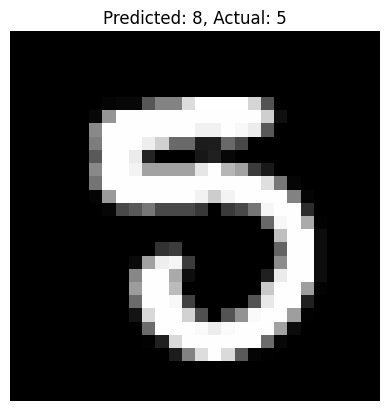

In [ ]:
import matplotlib.pyplot as plt
import random

# Set model to evaluation mode
model.eval()

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for model input
input_image = image.view(-1, 28*28)

# Get model prediction
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}, Actual: {label}")
plt.axis('off')
plt.show()




### Model B: 1 Hidden Layer Feedforward Neural Network (Tanh Activation)
<img src="./images/nn1.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
from torchsummary import summary
#Shows what the model looks like
summary(model, input_size=(784,))
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              Tanh-2                  [-1, 100]               0
            Linear-3                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------
Iteration: 500. Loss: 0.5058755278587341. Accuracy: 91.0999984741211
Iteration: 1000. Loss: 0.2824786901473999. Accuracy: 92.5999984741211
Iteration: 1500. Loss: 0.28009945154190063. Accuracy: 93.5199966430664
Iteration: 2000. Loss: 0.14435920119285583. Accuracy: 94.0
Iteration: 2500. Loss: 0.19282729923725128. Accuracy: 94.77999877929688
Iteration: 3000. Loss: 

In [ ]:
import matplotlib.pyplot as plt
import random

# Set model to evaluation mode
model.eval()

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for model input
input_image = image.view(-1, 28*28)

# Get model prediction
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}, Actual: {label}")
plt.axis('off')
plt.show()

### Model C: 1 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/nn1.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
from torchsummary import summary
#Shows what the model looks like
summary(model, input_size=(784,))
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              ReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------
Iteration: 500. Loss: 0.37251144647598267. Accuracy: 91.63999938964844
Iteration: 1000. Loss: 0.2487357258796692. Accuracy: 93.16999816894531
Iteration: 1500. Loss: 0.2486622929573059. Accuracy: 94.08999633789062
Iteration: 2000. Loss: 0.12761478126049042. Accuracy: 94.80000305175781
Iteration: 2500. Loss: 0.21595342457294464. Accuracy: 95.18000030517578
Iterati

In [ ]:
import matplotlib.pyplot as plt
import random

# Set model to evaluation mode
model.eval()

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for model input
input_image = image.view(-1, 28*28)

# Get model prediction
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}, Actual: {label}")
plt.axis('off')
plt.show()

### Model D: 2 Hidden Layer Feedforward Neural Network (ReLU Activation)


### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
from torchsummary import summary
#Shows what the model looks like
summary(model, input_size=(784,))
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              ReLU-2                  [-1, 100]               0
            Linear-3                  [-1, 100]          10,100
              ReLU-4                  [-1, 100]               0
            Linear-5                   [-1, 10]           1,010
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.34
Estimated Total Size (MB): 0.35
----------------------------------------------------------------
Iteration: 500. Loss: 0.36210355162620544. Accuracy: 91.48999786376953
Iteration: 1000. Loss: 0.1846974939107895. Accuracy: 93.70999908447266
Iteration: 1500. Loss: 0.16324417293071747. Accuracy: 94.5999984741211
Iteration: 2000. Loss: 

In [ ]:
import matplotlib.pyplot as plt
import random

# Set model to evaluation mode
model.eval()

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for model input
input_image = image.view(-1, 28*28)

# Get model prediction
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}, Actual: {label}")
plt.axis('off')
plt.show()

### Model E: 3 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/nn3.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
from torchsummary import summary
#Shows what the model looks like
summary(model, input_size=(784,))
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              ReLU-2                  [-1, 100]               0
            Linear-3                  [-1, 100]          10,100
              ReLU-4                  [-1, 100]               0
            Linear-5                  [-1, 100]          10,100
              ReLU-6                  [-1, 100]               0
            Linear-7                   [-1, 10]           1,010
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.38
Estimated Total Size (MB): 0.39
----------------------------------------------------------------
Iteration: 500. Loss: 0.46316471695899963. Accuracy: 87.73999786376953
Iteration: 1000. Loss: 0.225447997450

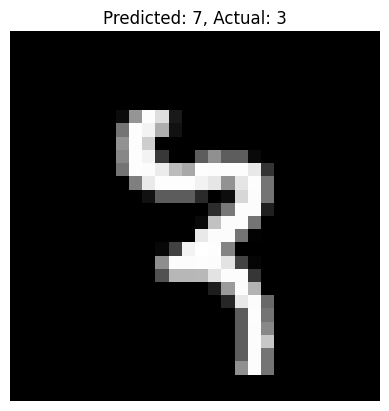

In [ ]:
import matplotlib.pyplot as plt
import random

# Set model to evaluation mode
model.eval()

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for model input
input_image = image.view(-1, 28*28)

# Get model prediction
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}, Actual: {label}")
plt.axis('off')
plt.show()

### Deep Learning
- 2 ways to expand a neural network
    - More non-linear activation units (neurons)
    - More hidden layers
- Cons
    - Need a larger dataset

    - Does not necessarily mean higher accuracy

# Summary


- **Types** of Activation functions
    - Sigmoid
    - Tanh
    - ReLU
- Feedforward Neural Network **Models**
    - Model A: 1 hidden layer (**sigmoid** activation)
    - Model B: 1 hidden layer (**tanh** activation)
    - Model C: 1 hidden layer (**ReLU** activation)
    - Model D: **2 hidden** layers (ReLU activation)
    - Model E: **3 hidden** layers (ReLU activation)

- Ways to Expand Model’s **Capacity**
    - More non-linear activation units (**neurons**)
    - More hidden **layers**
- **Cons** of Expanding Capacity
    - Need more **data**
    - Does not necessarily mean higher **accuracy**
